In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style='whitegrid')
sns.set_palette('bright')
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import fftpack
import datetime
from sklearn import mixture
import warnings
warnings.filterwarnings('ignore')
from scipy import fft
from scipy import signal
import math
from acoustics.cepstrum import complex_cepstrum
from acoustics.cepstrum import inverse_complex_cepstrum
from scipy.spatial import distance

Text(0.5, 1.0, 'Data')

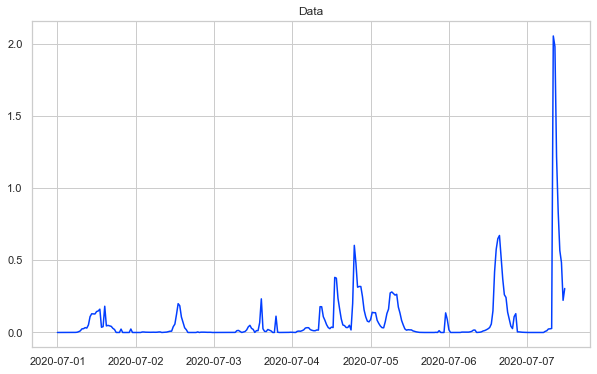

In [2]:
df = pd.read_csv(r"C:\Users\admin\Documents\Algo Asylum\Precipitation_Analysis\preci_all.csv")
df.columns = ['Date','ddate','value','geo']
df['Date'] = df['Date'].astype(str).str[:-2].astype(str)
df['Date'].iloc[43]
df.columns
df['Date'] = pd.to_datetime(df['Date'],format='%Y%m%d%H%M')
del df['ddate'],df['geo']
#plt.show()
sd = df.loc[(df['Date'].between('2020-07-01 00:00:00', '2020-07-07 11:30:00', inclusive=True))]
#sd['Date'] = pd.to_datetime(sd['Date'])
#y['date'] = y.groupby(y['date'].dt.date).sum()
#sd = sd.iloc[:, 1:]
s = sd['value']
t = sd['Date']
plt.figure(figsize=(10,6))
plt.plot(t, s)
plt.title("Data")

Text(0.5, 1.0, 'Data')

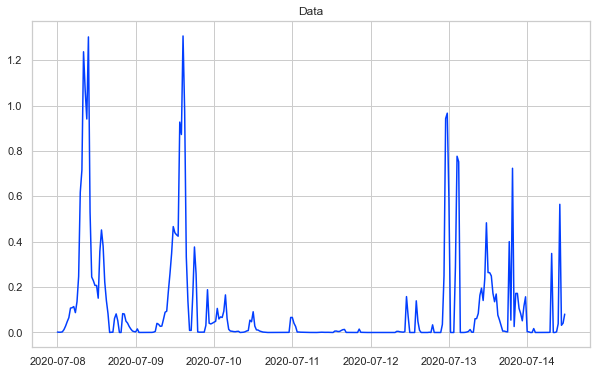

In [3]:
df1 = pd.read_csv(r"C:\Users\admin\Documents\Algo Asylum\Precipitation_Analysis\preci_all.csv")
df1.columns = ['Date','ddate','value','geo']
df1['Date'] = df1['Date'].astype(str).str[:-2].astype(str)
df1['Date'].iloc[43]
df1.columns
df1['Date'] = pd.to_datetime(df1['Date'],format='%Y%m%d%H%M')
del df1['ddate'],df1['geo']
#plt.show()
sd1 = df1.loc[(df1['Date'].between('2020-07-08 00:00:00', '2020-07-14 11:30:00', inclusive=True))]
#sd['Date'] = pd.to_datetime(sd['Date'])
#y['date'] = y.groupby(y['date'].dt.date).sum()
#sd = sd.iloc[:, 1:]
s2 = sd1['value']
t2 = sd1['Date']
plt.figure(figsize=(10,6))
plt.plot(t2, s2)
plt.title("Data")

Text(0.5, 1.0, 'Data')

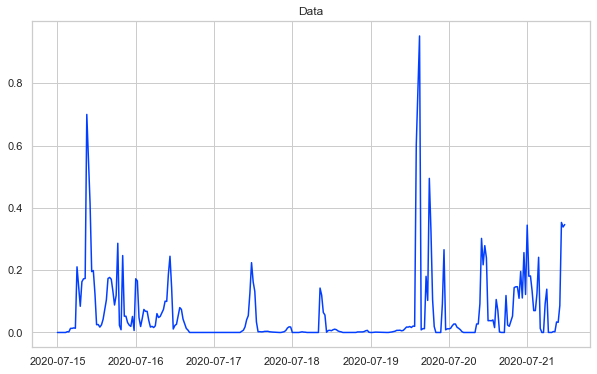

In [4]:
df2 = pd.read_csv(r"C:\Users\admin\Documents\Algo Asylum\Precipitation_Analysis\preci_all.csv")
df2.columns = ['Date','ddate','value','geo']
df2['Date'] = df2['Date'].astype(str).str[:-2].astype(str)
df2['Date'].iloc[43]
df2.columns
df2['Date'] = pd.to_datetime(df2['Date'],format='%Y%m%d%H%M')
del df2['ddate'],df2['geo']
#plt.show()
sd2 = df2.loc[(df2['Date'].between('2020-07-15 00:00:00', '2020-07-21 11:30:00', inclusive=True))]
#sd['Date'] = pd.to_datetime(sd['Date'])
#y['date'] = y.groupby(y['date'].dt.date).sum()
#sd = sd.iloc[:, 1:]
s3 = sd2['value']
t3 = sd2['Date']
plt.figure(figsize=(10,6))
plt.plot(t3, s3)
plt.title("Data")

In [5]:
print(np.shape(s))
print(np.shape(s2))
print(np.shape(s3))

(312,)
(312,)
(312,)


In [6]:
from scipy.stats import wasserstein_distance

In [7]:
tf1 = np.arange(s.shape[0])
signal_1 = pd.DataFrame(zip(tf1,s),columns=['Time','Value'])
tf2 = np.arange(s2.shape[0])
signal_2 = pd.DataFrame(zip(tf2,s2),columns=['Time','Value'])
tf3 = np.arange(s3.shape[0])
signal_3 = pd.DataFrame(zip(tf3,s3),columns=['Time','Value'])

In [8]:
signal_2.equals(signal_3)

False

In [9]:
def jaccard(dff, dfj):
    a = 0
    intersect =[]
    union = []
    n1 = np.array(dff.Value)
    n2 = np.array(dfj.Value)
    n1 = np.append(n1,n2.max())
    n1 = np.append(n1,n2.min())
    n2 = np.append(n2,n1.max())
    n2 = np.append(n2,n1.min())
    count1, bin_edges1 = np.histogram(n2, bins=20)
    count2, bin_edges2 = np.histogram(n1, bins=20)

    for x in range(count1.shape[0]):
        intersect.append(min(count1[x],count2[x]))
    intersect = np.array([intersect])
    isum = intersect.sum()

    for x in range(count1.shape[0]):
        union.append(max(count1[x],count2[x]))
    union = np.array([union])
    usum = union.sum()

    jacc1 = isum/usum
            #x = wasserstein_distance(dff.value,dfj.value)
    a = jacc1
    return a

# FFT - Real and Imag

In [10]:
def freq(df):
    N = df.shape[0]
    y = np.array(df['Value'])
    f = fftpack.fftfreq(len(y))
    yf = fftpack.fft(y)
    fft_data1 = pd.DataFrame(zip(f,yf.real),columns=['Freq','Value'])
    fft_data2 = pd.DataFrame(zip(f,yf.imag),columns=['Freq','Value'])
    return fft_data1,fft_data2

In [11]:
freq_ampli1,freq_ampli1i = freq(signal_1)
freq_ampli2,freq_ampli2i = freq(signal_2)
freq_ampli3,freq_ampli3i = freq(signal_3)

# FFT - Magnitude and phase

In [12]:
#Func gives magnitude of FFT provide dataframe in Time Domain
def freq_mag(df):
    N = df.shape[0]
    y = np.array(df['Value'])
    f = fftpack.fftfreq(len(y))
    yf = fftpack.fft(y)
    fft_data = pd.DataFrame(zip(f,np.abs(yf)),columns=['Freq','Value'])
    return fft_data

In [13]:
def freq_phase(df):
    N = df.shape[0]
    y = np.array(df['Value'])
    f = fftpack.fftfreq(len(y))
    yf = fftpack.fft(y)
    fft_data1 = pd.DataFrame(zip(f,np.angle(yf)),columns=['Freq','Value'])
    return fft_data1

In [14]:
freq_ampli_mag1 = freq_mag(signal_1)
freq_ampli_phase1 = freq_phase(signal_1)
freq_ampli_mag2 = freq_mag(signal_2)
freq_ampli_phase2 = freq_phase(signal_2)
freq_ampli_mag3 = freq_mag(signal_3)
freq_ampli_phase3 = freq_phase(signal_3)

# Cepstrum

In [15]:
from acoustics.cepstrum import complex_cepstrum
from acoustics.cepstrum import inverse_complex_cepstrum

In [16]:
duration = signal_1.shape[0]
fs = 1.0
samples = int(fs*duration)
t = np.arange(samples) / fs
ceps1, _ = complex_cepstrum(signal_1['Value'])
print(ceps1)

[ 7.13362517e-01  9.51161178e-01  1.17894951e-01  1.11238872e-01
  2.48482745e-02  6.56525624e-02 -6.13874098e-02  8.43103042e-02
 -1.44024904e-01  4.46233040e-02 -3.86558828e-02  3.72505125e-03
  3.30364654e-03 -5.99472857e-03 -2.44243384e-02  5.15228458e-03
 -3.43637596e-02 -2.84409480e-03 -1.90677409e-02 -1.78490971e-02
 -8.96572456e-03 -8.31656877e-04 -1.39119074e-02  2.26296745e-03
 -1.68061419e-02 -2.73426266e-03 -1.63579470e-02  3.67816488e-03
  1.91167364e-02  1.35530590e-02  7.94692809e-03  2.68568236e-02
  2.87882395e-02  2.22857938e-02  3.31595732e-02 -4.29306436e-02
  2.98657967e-02  7.28240972e-02 -4.31449155e-02  3.50176589e-02
  1.26478232e-02  1.02194323e-02  1.43944659e-02  7.72259107e-03
 -1.57342844e-02  1.57064152e-02 -1.69125825e-02  1.29720596e-02
 -6.34858946e-03  1.40893552e-02  8.52963692e-03  2.09674758e-02
  1.21455356e-02  3.85944107e-02  1.01642637e-02  1.89046882e-02
 -1.01122911e-02  3.08232808e-02  1.71392350e-02  1.71120888e-02
  1.53710976e-02  2.54193

In [17]:
duration = signal_2.shape[0]
fs = 1.0
samples = int(fs*duration)
t = np.arange(samples) / fs
ceps2, _ = complex_cepstrum(signal_2['Value'])
print(ceps2)

[ 6.36979347e-01  3.31268155e+00  4.50429562e+00  2.28871105e+00
  2.75511495e-01  2.52578157e-01 -1.06590410e+00 -8.89618910e-01
  1.82247742e-01  8.25210088e-01 -3.07591937e-02 -9.72718897e-02
 -6.55546877e-02 -1.39008978e-05 -1.22994578e-01  2.30857530e-01
 -9.07759625e-03 -9.90692588e-02 -1.91092545e-01  1.84142446e-01
  1.58178166e-01 -1.40234594e-01 -1.83563687e-02  3.28357974e-01
 -1.48471692e-01 -2.33234155e-02  1.35179974e-01 -4.31235747e-02
  2.21093623e-01 -5.83970476e-02  1.05509384e-01  9.61919347e-02
  2.07809822e-02 -1.65128278e-01 -7.88443511e-03  9.33001317e-02
  9.84216300e-02  1.34241390e-03 -5.28136454e-02 -5.10870096e-02
 -3.80176875e-02  4.61132541e-02 -5.79728002e-02 -1.43160676e-02
  2.09793304e-02  8.72747682e-02 -3.26423647e-02  3.94932005e-02
 -1.70233110e-01  9.47561792e-02 -3.19750734e-03  1.60424117e-03
  1.23121633e-01  4.93395045e-02 -8.68350933e-02 -7.16161746e-02
  1.49756136e-01  6.85447488e-02  2.41990983e-01  1.85128569e-01
  7.00677162e-02  1.51710

In [18]:
duration = signal_3.shape[0]
fs = 1.0
samples = int(fs*duration)
t = np.arange(samples) / fs
ceps3, _ = complex_cepstrum(signal_3['Value'])
print(ceps3)

[ 1.66685174e-01 -2.81779530e+00 -3.92872395e-01  2.92380335e+00
  3.10399169e-01  1.36411749e+00 -1.03829930e+00 -5.33397442e-01
 -8.85467495e-01  3.70674829e-01 -2.84199949e-02 -3.79362701e-01
 -3.90239280e-01  6.03346560e-01  7.86456829e-01 -2.72843480e-02
 -3.76885050e-01  1.46987458e-01  6.35799903e-02  2.31288772e-01
 -9.65061412e-02  4.54040203e-01  1.51062054e-01 -2.82618618e-01
  1.75748985e-01  9.01198775e-02 -2.71442303e-01  7.18809079e-03
 -2.07237489e-01  2.00066122e-02  1.44522094e-01  3.65448628e-02
  3.41534799e-02  1.09317568e-01  2.61064984e-02  2.51375062e-02
  1.26738897e-01 -5.86142463e-02 -1.23599165e-02 -2.82872731e-02
 -3.90078027e-02 -2.91018897e-02  2.84613481e-01  6.64923549e-02
  8.20988547e-02  3.42914918e-02  1.41542407e-01  3.40189711e-02
  2.83327926e-02  5.27898245e-02  1.58748923e-01  1.44175465e-01
 -7.43262146e-03 -1.25429051e-01  1.94662798e-02  5.59666042e-02
  5.10066394e-02  5.08707686e-02 -2.69582306e-02  1.20143099e-02
 -8.30397769e-02  7.39450

In [19]:
cepstrum1 = pd.DataFrame(ceps1,columns=['Value'])
cepstrum2 = pd.DataFrame(ceps2,columns=['Value'])
cepstrum3 = pd.DataFrame(ceps3,columns=['Value'])

## Results

In [20]:
from prettytable import PrettyTable

In [21]:
print('Signal 1 sum - ', signal_1['Value'].sum())
print('Signal 2 sum - ', signal_2['Value'].sum())
print('Signal 3 sum - ', signal_3['Value'].sum())

Signal 1 sum -  24.406549158168627
Signal 2 sum -  31.711069916658044
Signal 3 sum -  18.82813176053491


In [22]:
print('Signal 1 zero count - ', signal_1["Value"].isin([0]).sum())
print('Signal 2 zero count - ', signal_2["Value"].isin([0]).sum())
print('Signal 3 zero count - ', signal_3["Value"].isin([0]).sum())

Signal 1 zero count -  57
Signal 2 zero count -  53
Signal 3 zero count -  46


In [23]:
table0 = PrettyTable(['Signal 1', 'Signal 2', 'Signal 3'])
table0.add_row([signal_1['Value'].describe(),signal_2['Value'].describe(),signal_3['Value'].describe()])
print(table0)

+-----------------------------+-----------------------------+-----------------------------+
|           Signal 1          |           Signal 2          |           Signal 3          |
+-----------------------------+-----------------------------+-----------------------------+
|     count    312.000000     |     count    312.000000     |     count    312.000000     |
|     mean       0.078226     |     mean       0.101638     |     mean       0.060347     |
|     std        0.209229     |     std        0.222666     |     std        0.118838     |
|     min        0.000000     |     min        0.000000     |     min        0.000000     |
|     25%        0.000212     |     25%        0.000065     |     25%        0.000056     |
|     50%        0.010567     |     50%        0.004736     |     50%        0.011469     |
|     75%        0.055074     |     75%        0.082951     |     75%        0.070205     |
|     max        2.054481     |     max        1.306613     |     max        0.9

+-----------+-----------+-----------+---------------+---------------+---------------+
| EMD (1-2) | EMD (2-3) | EMD (1-3) | Jaccard (1-2) | Jaccard (2-3) | Jaccard (1-3) |
+-----------+-----------+-----------+---------------+---------------+---------------+
|  0.03436  |  0.04332  |  0.02018  |    0.89728    |    0.86905    |    0.95031    |
+-----------+-----------+-----------+---------------+---------------+---------------+


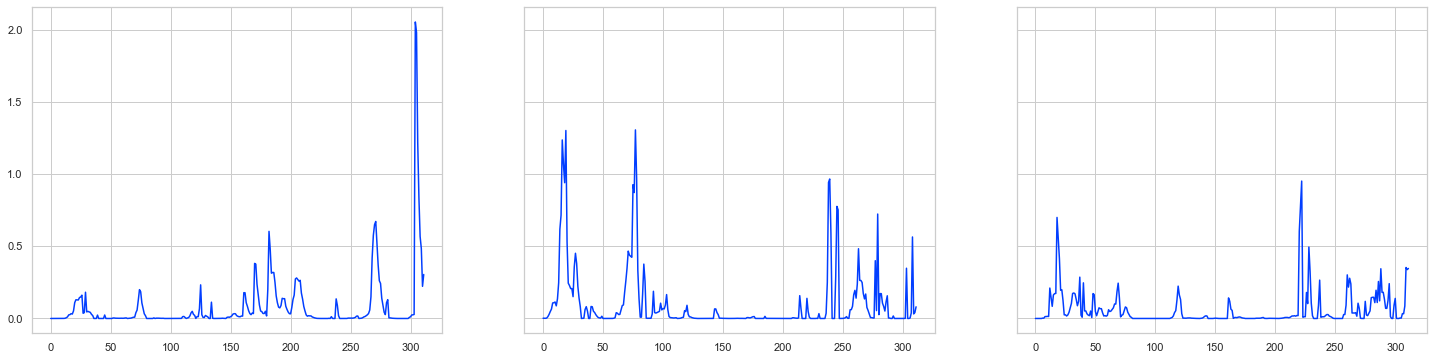

In [24]:
fig, axs = plt.subplots(1,3,figsize=(25,6), sharex=True, sharey=True)
axs[0].plot(signal_1["Time"],signal_1['Value'])
axs[1].plot(signal_2["Time"],signal_2['Value'])
axs[2].plot(signal_3["Time"],signal_3['Value'])
table = PrettyTable(['EMD (1-2)', 'EMD (2-3)', 'EMD (1-3)','Jaccard (1-2)', 'Jaccard (2-3)', 'Jaccard (1-3)'])
table.add_row([np.round(wasserstein_distance(s,s2),5),np.round(wasserstein_distance(s2,s3), 5), np.round(wasserstein_distance(s,s3), 5), np.round(jaccard(signal_1,signal_2), 5), np.round(jaccard(signal_2,signal_3), 5), np.round(jaccard(signal_1,signal_3), 5)])
print(table)

+-----------+-----------+-----------+---------------+---------------+---------------+
| EMD (1-2) | EMD (2-3) | EMD (1-3) | Jaccard (1-2) | Jaccard (2-3) | Jaccard (1-3) |
+-----------+-----------+-----------+---------------+---------------+---------------+
|  0.33572  |  0.77161  |  0.73406  |    0.89728    |    0.73003    |    0.63969    |
|  0.18498  |  0.74592  |  0.75951  |    0.86905    |    0.67021    |    0.70652    |
+-----------+-----------+-----------+---------------+---------------+---------------+


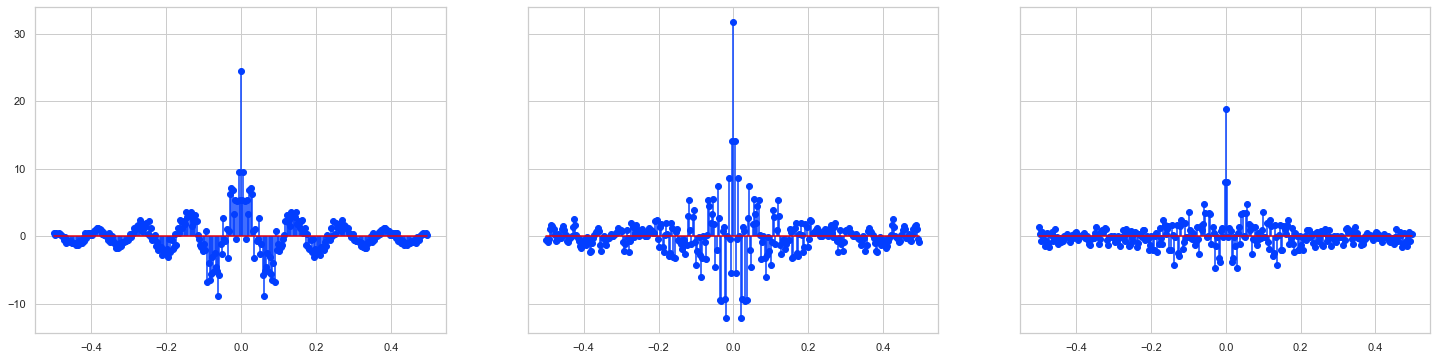

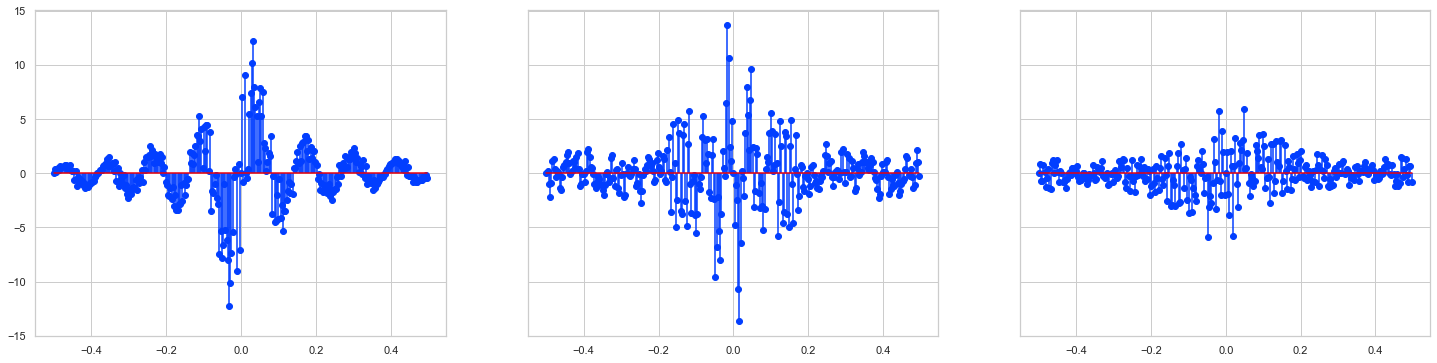

In [25]:
fig, axs = plt.subplots(1,3,figsize=(25,6),sharex=True, sharey=True)
axs[0].stem(freq_ampli1['Freq'], freq_ampli1['Value'])
#axs[0].set_xlim(-0.1, 0.1)
axs[1].stem(freq_ampli2['Freq'], freq_ampli2['Value'])
#axs[1].set_xlim(-0.1, 0.1)
axs[2].stem(freq_ampli3['Freq'], freq_ampli3['Value'])

fig, axs = plt.subplots(1,3,figsize=(25,6),sharex=True, sharey=True)
axs[0].stem(freq_ampli1i['Freq'], freq_ampli1i['Value'])
axs[1].stem(freq_ampli2i['Freq'], freq_ampli2i['Value'])
axs[2].stem(freq_ampli3i['Freq'], freq_ampli3i['Value'])

table2 = PrettyTable(['EMD (1-2)', 'EMD (2-3)', 'EMD (1-3)','Jaccard (1-2)', 'Jaccard (2-3)', 'Jaccard (1-3)'])
table2.add_row([np.round(wasserstein_distance(freq_ampli1['Value'],freq_ampli2['Value']),5),np.round(wasserstein_distance(freq_ampli2['Value'],freq_ampli3['Value']), 5), np.round(wasserstein_distance(freq_ampli1['Value'],freq_ampli3['Value']), 5), np.round(jaccard(freq_ampli1,freq_ampli2), 5), np.round(jaccard(freq_ampli2,freq_ampli3), 5), np.round(jaccard(freq_ampli1,freq_ampli3), 5)])
table2.add_row([np.round(wasserstein_distance(freq_ampli1i['Value'],freq_ampli2i['Value']),5),np.round(wasserstein_distance(freq_ampli2i['Value'],freq_ampli3i['Value']), 5), np.round(wasserstein_distance(freq_ampli1i['Value'],freq_ampli3i['Value']), 5), np.round(jaccard(freq_ampli1i,freq_ampli2i), 5), np.round(jaccard(freq_ampli2i,freq_ampli3i), 5), np.round(jaccard(freq_ampli1i,freq_ampli3i), 5)])
print(table2)

+-----------+-----------+-----------+---------------+---------------+---------------+
| EMD (1-2) | EMD (2-3) | EMD (1-3) | Jaccard (1-2) | Jaccard (2-3) | Jaccard (1-3) |
+-----------+-----------+-----------+---------------+---------------+---------------+
|  0.29104  |  1.18871  |  1.15093  |    0.88589    |    0.62694    |    0.68365    |
|  0.10723  |   0.117   |  0.07121  |     0.7493    |    0.78409    |    0.63542    |
+-----------+-----------+-----------+---------------+---------------+---------------+


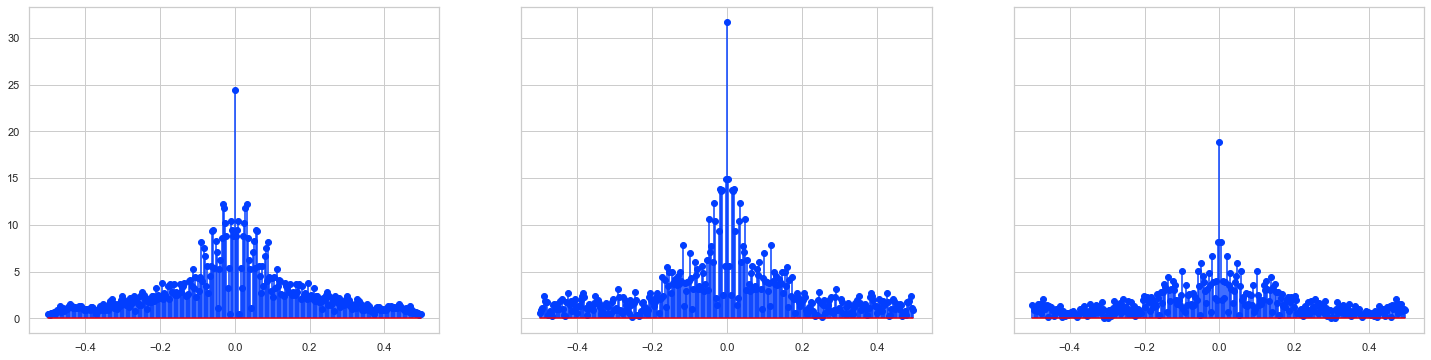

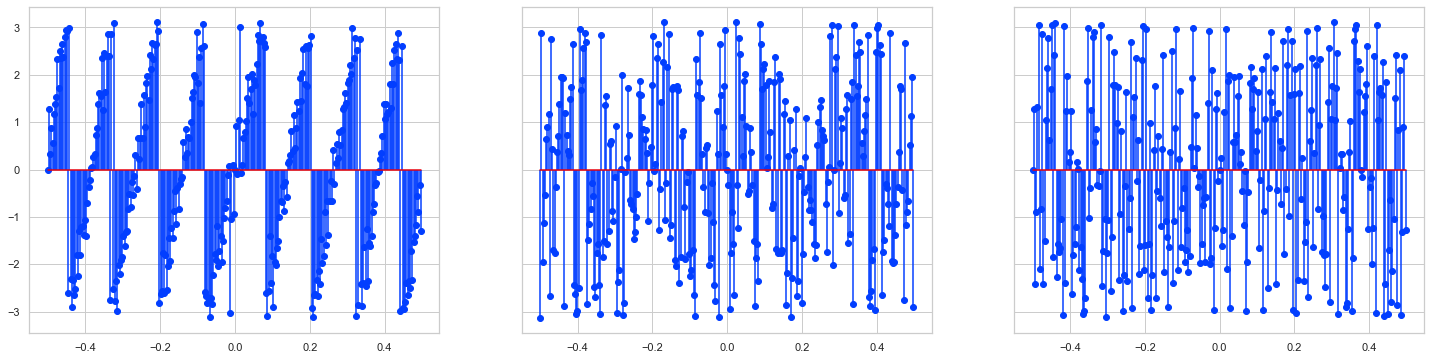

In [26]:
fig, axs = plt.subplots(1,3,figsize=(25,6), sharex=True, sharey=True)
axs[0].stem(freq_ampli_mag1['Freq'], freq_ampli_mag1['Value'])
#axs[0].set_xlim(-0.1, 0.1)
axs[1].stem(freq_ampli_mag2['Freq'], freq_ampli_mag2['Value'])
#axs[1].set_xlim(-0.1, 0.1)
axs[2].stem(freq_ampli_mag3['Freq'], freq_ampli_mag3['Value'])

fig, axs = plt.subplots(1,3,figsize=(25,6),sharex=True, sharey=True)
axs[0].stem(freq_ampli_phase1['Freq'], freq_ampli_phase1['Value'])
axs[1].stem(freq_ampli_phase2['Freq'], freq_ampli_phase2['Value'])
axs[2].stem(freq_ampli_phase3['Freq'], freq_ampli_phase3['Value'])

table3 = PrettyTable(['EMD (1-2)', 'EMD (2-3)', 'EMD (1-3)','Jaccard (1-2)', 'Jaccard (2-3)', 'Jaccard (1-3)'])
table3.add_row([np.round(wasserstein_distance(freq_ampli_mag1['Value'],freq_ampli_mag2['Value']),5),np.round(wasserstein_distance(freq_ampli_mag2['Value'],freq_ampli_mag3['Value']), 5), np.round(wasserstein_distance(freq_ampli_mag1['Value'],freq_ampli_mag3['Value']), 5), np.round(jaccard(freq_ampli_mag1,freq_ampli_mag2), 5), np.round(jaccard(freq_ampli_mag2,freq_ampli_mag3), 5), np.round(jaccard(freq_ampli_mag1,freq_ampli_mag3), 5)])
table3.add_row([np.round(wasserstein_distance(freq_ampli_phase1['Value'],freq_ampli_phase2['Value']),5),np.round(wasserstein_distance(freq_ampli_phase2['Value'],freq_ampli_phase3['Value']), 5), np.round(wasserstein_distance(freq_ampli_phase1['Value'],freq_ampli_phase3['Value']), 5), np.round(jaccard(freq_ampli_phase1,freq_ampli_phase2), 5), np.round(jaccard(freq_ampli_phase2,freq_ampli_phase3), 5), np.round(jaccard(freq_ampli_phase1,freq_ampli_phase3), 5)])
print(table3)

+-----------+-----------+-----------+---------------+---------------+---------------+
| EMD (1-2) | EMD (2-3) | EMD (1-3) | Jaccard (1-2) | Jaccard (2-3) | Jaccard (1-3) |
+-----------+-----------+-----------+---------------+---------------+---------------+
|  0.11254  |   0.0362  |  0.12101  |    0.86905    |    0.88589    |    0.72055    |
+-----------+-----------+-----------+---------------+---------------+---------------+


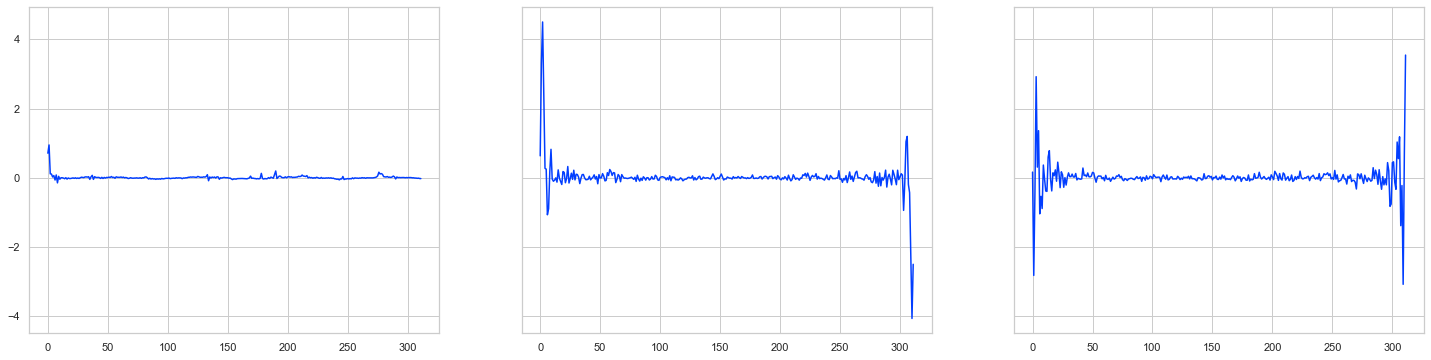

In [27]:
fig, axs = plt.subplots(1,3,figsize=(25,6), sharex = True, sharey = True)
axs[0].plot(ceps1)
axs[1].plot(ceps2)
axs[2].plot(ceps3)
table4 = PrettyTable(['EMD (1-2)', 'EMD (2-3)', 'EMD (1-3)','Jaccard (1-2)', 'Jaccard (2-3)', 'Jaccard (1-3)'])
table4.add_row([np.round(wasserstein_distance(ceps1,ceps2), 5), np.round(wasserstein_distance(ceps2,ceps3), 5), np.round(wasserstein_distance(ceps1,ceps3),5), np.round(jaccard(cepstrum1,cepstrum2),5), np.round(jaccard(cepstrum2,cepstrum3),5), np.round(jaccard(cepstrum1,cepstrum3),5)])
print(table4)